In [1]:
%matplotlib inline
from building_sensor_analysis_api import *

### Room data

1. The data is the CSV files taken from databricks present in hte databricks.
2. databricks allow only 1000k rows to be downloaded.
3. So only analysis for few teamplates can only be performed

In [2]:
# Read the data for room 4226 and register the table
df_room4226 = spark.read.csv('data/rm4226.csv', header=True)
df_room4226.registerTempTable('rm4226')
pd.DataFrame(df_room4226.head(5), columns=["sensor_id", "timeseries", "values", "room", "template"])

sensor_id                 timeseries values  \
0  964a8154-77de-11e2-bad4-00163e005319  2014-07-16T10:43:19+00:00    0.0   
1  964a8154-77de-11e2-bad4-00163e005319  2014-07-16T10:43:19+00:00    0.0   
2  964a8154-77de-11e2-bad4-00163e005319  2014-07-16T10:43:19+00:00    0.0   
3  964a8154-77de-11e2-bad4-00163e005319  2014-07-16T10:51:17+00:00    0.0   
4  964a8154-77de-11e2-bad4-00163e005319  2014-07-16T10:51:17+00:00    0.0   

      room         template  
0  Rm-4226  Damper Position  
1  Rm-4226  Damper Position  
2  Rm-4226  Damper Position  
3  Rm-4226  Damper Position  
4  Rm-4226  Damper Position

In [3]:
# Read the data for room 2138 and register the table
df_room2138 = spark.read.csv('data/rm2138.csv', header=True)
df_room2138.registerTempTable('rm2138')
pd.DataFrame(df_room2138.head(5), columns=["sensor_id", "timeseries", "values", "room", "template"])

sensor_id                 timeseries values  \
0  0f6d2154-77df-11e2-83c4-00163e005319  2013-09-04T05:22:17+00:00    0.0   
1  0f6d2154-77df-11e2-83c4-00163e005319  2013-09-04T05:22:17+00:00    0.0   
2  0f6d2154-77df-11e2-83c4-00163e005319  2013-09-04T05:22:17+00:00    0.0   
3  0f6d2154-77df-11e2-83c4-00163e005319  2013-09-04T05:24:18+00:00    0.0   
4  0f6d2154-77df-11e2-83c4-00163e005319  2013-09-04T05:24:18+00:00    0.0   

      room         template  
0  Rm-2138  Cooling Command  
1  Rm-2138  Cooling Command  
2  Rm-2138  Cooling Command  
3  Rm-2138  Cooling Command  
4  Rm-2138  Cooling Command

### All Building Sensor Data

- This table contains building details, sensor information.
- This data is taken from databricks and is limited to 1000k rows.

In [4]:
# Read the data for all rooms and register the table
df_alldata = spark.read.csv('data/allbuildingsensordata.csv', header=True)
df_alldata.registerTempTable('allbuildingsensordata')
pd.DataFrame(df_alldata.head(5), columns=["name", "room", "sensor_id", "template", "timeseries", "values"])

name     room  \
0  UCSD-Main-EBU3B-Flr-4-Rm-4250-Damper Command  Rm-4250   
1  UCSD-Main-EBU3B-Flr-4-Rm-4250-Damper Command  Rm-4250   
2  UCSD-Main-EBU3B-Flr-4-Rm-4250-Damper Command  Rm-4250   
3  UCSD-Main-EBU3B-Flr-4-Rm-4250-Damper Command  Rm-4250   
4  UCSD-Main-EBU3B-Flr-4-Rm-4250-Damper Command  Rm-4250   

                              sensor_id        template  \
0  cf3d24a2-77df-11e2-83c4-00163e005319  Damper Command   
1  cf3d24a2-77df-11e2-83c4-00163e005319  Damper Command   
2  cf3d24a2-77df-11e2-83c4-00163e005319  Damper Command   
3  cf3d24a2-77df-11e2-83c4-00163e005319  Damper Command   
4  cf3d24a2-77df-11e2-83c4-00163e005319  Damper Command   

                  timeseries values  
0  2014-10-15T07:29:49+00:00    0.0  
1  2014-10-17T07:00:11+00:00    0.0  
2  2014-10-18T22:04:43+00:00  -0.19  
3  2014-10-19T01:08:03+00:00  -0.19  
4  2014-10-20T14:46:43+00:00  -0.13

## Piecewise linear compression of sensor data

1. runAnalysis will compress and reconstruct the data.
2. The analysis performed here is on the sensor data for room4226 starting from 2013-12-01 to 2013-12-07
3. Since the data is not completely available, analysis on all templates cannot be performed.
4. analysis is performed only for Zone Temperature.
5. Dottted plot represents the original and dashed plot represents the reconstructed signal.

### why compression

- Data is compressed and stored so as to occupy lesser disk space.
- The reconstruction error and compression are proportional.
- so it is a trade off to achieve what level of compression without loosing much data.

SELECT * FROM rm4226 WHERE template='Zone Temperature' AND timeseries BETWEEN '2013-12-01' AND '2013-12-07'
Std dev is  3.3478567606
0    82.0
1    82.0
2    82.0
3    82.0
4    82.0
Name: values, dtype: float64
range= 15.18


building_sensor_analysis_api.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  S[np.isnan(S)] = 0


error = 0.0307097821904 error/_std= 0.00917296777803
0


building_sensor_analysis_api.py:73: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  ReconDF=ReconDF.sort(['time'], ascending=[1])


axes1Count 0
4017


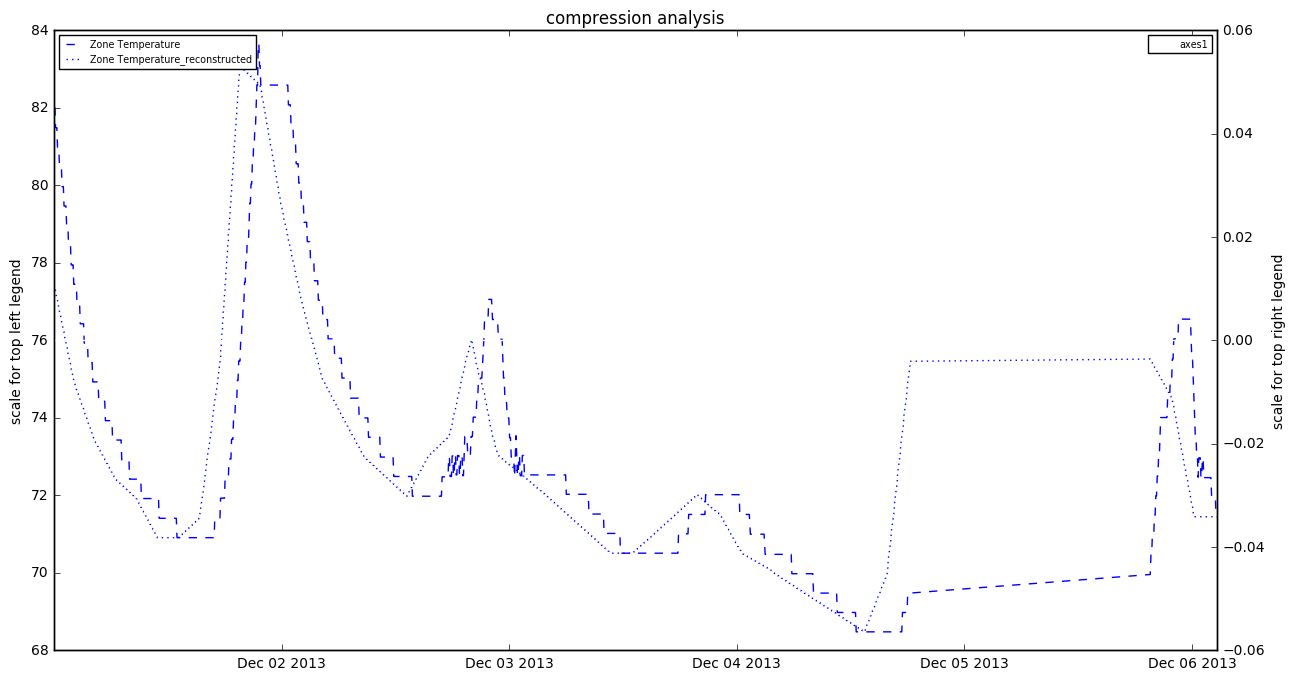

In [5]:
[dfs,plotTemplates] = runAnalysis(table='rm4226', stTime='2013-12-01', enTime='2013-12-07', templateCount = 1)
plotResults(dfs,plotTemplates)

## Piecewise constant compression of sensor data.

1. runAnalysis will compress and reconstruct the data.
2. The analysis performed here is on the sensor data for room2138 starting from 2013-12-01 to 2013-12-07
3. Since the data is not completely available, analysis on all templates cannot be performed.
4. analysis is performed only for Actual Supply Flow
5. Dottted plot represents the original and dashed plot represents the reconstructed signal.

SELECT * FROM rm2138 WHERE template='Zone Temperature' AND timeseries BETWEEN '2013-12-01' AND '2013-12-07'
Std dev is  nan
Series([], Name: values, dtype: object)
Exception for template:  Zone Temperature
SELECT * FROM rm2138 WHERE template='Actual Supply Flow' AND timeseries BETWEEN '2013-12-01' AND '2013-12-07'
Std dev is  116.768195462
0    20.99
1    20.99
2    20.99
3    23.93
4    23.93
Name: values, dtype: float64
range= 560.39


building_sensor_analysis_api.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  S[np.isnan(S)] = 0


error = 0.129878071229 error/_std= 0.00111227265879
SELECT * FROM rm2138 WHERE template='Occupied Clg Min' AND timeseries BETWEEN '2013-12-01' AND '2013-12-07'
Std dev is  nan
Series([], Name: values, dtype: object)
Exception for template:  Occupied Clg Min
SELECT * FROM rm2138 WHERE template='Occupied Htg Flow' AND timeseries BETWEEN '2013-12-01' AND '2013-12-07'
Std dev is  nan
Series([], Name: values, dtype: object)
Exception for template:  Occupied Htg Flow
SELECT * FROM rm2138 WHERE template='Common Setpoint' AND timeseries BETWEEN '2013-12-01' AND '2013-12-07'
Std dev is  nan
Series([], Name: values, dtype: object)
Exception for template:  Common Setpoint
0
axes0Count 0


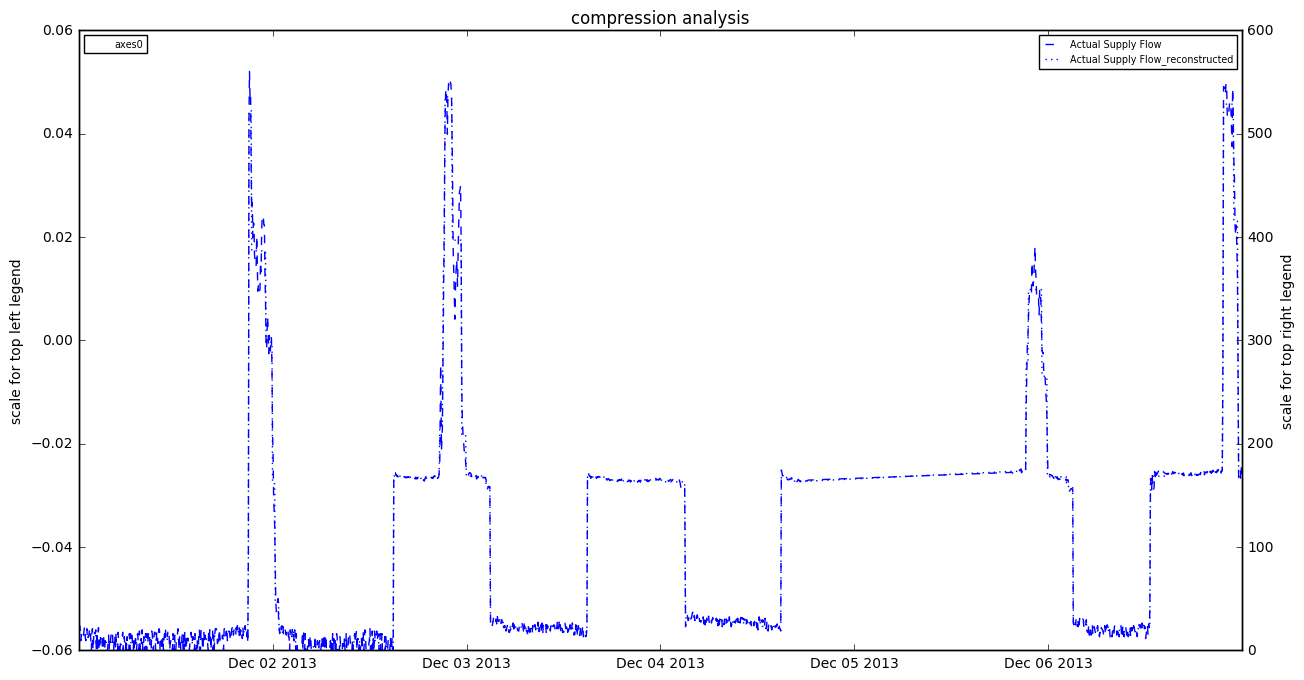

In [6]:
[dfs,plotTemplates]=runAnalysis(table='rm2138',stTime='2013-12-01',enTime='2013-12-07', templateCount=5)
plotResults(dfs, plotTemplates)